1. Dataset Selection and Initial Exploration 

In [173]:
import pandas as pd # type: ignore
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt

df_housing=pd.read_csv("Housing.csv")
df_housing.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [174]:
#KNOW THE NUMBER OF ROWS AND COLUMNS IN THE DATAFRAME
df_housing.shape

(21613, 21)

In [175]:
#DETERMINE THE NUMBER OF NON NULL VALUES OF EACH FEATURE AND THE DATA TYPE OF IT
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [176]:
#STATISTICS FOR THE NUMERIC FEATURES OF THE DATAFRAME
df_housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [177]:
#STATISTICS FOR NO NUMERIC FEATURES OF THE DATAFRAME
df_housing.describe(include="O")

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [178]:
#use value counts to determine if the data is discrete, continuous, nominal, ordinal
#df_housing["beds"].value_counts()

2. Data Cleaning 

In [179]:
#DROPING DUPLICATE VALUES WITHIN THE DATAFRAME
df_housing.drop_duplicates()
df_housing.shape

(21613, 21)

In [180]:
#CONVERT THE DATA TYPE OF DATE FROM OBJECT TO DATETIME
#COLUMN: DATE
import datetime as dt
df_housing["date"]=pd.to_datetime(df_housing["date"])
df_housing["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: date
Non-Null Count  Dtype         
--------------  -----         
21613 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 169.0 KB


In [181]:
#COLUMN: BATHROOM & FLOORS
df_housing["bathrooms"].value_counts()
df_housing["floors"].value_counts()
df_housing=df_housing.astype({'bathrooms': 'int64','floors':'int64'})

In [182]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  int64         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  int64         
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

C:\Users\alexa\AppData\Local\Temp\ipykernel_25004\3776696745.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()])


Text(0.5, 1.0, 'Distribution of number of bathrooms')

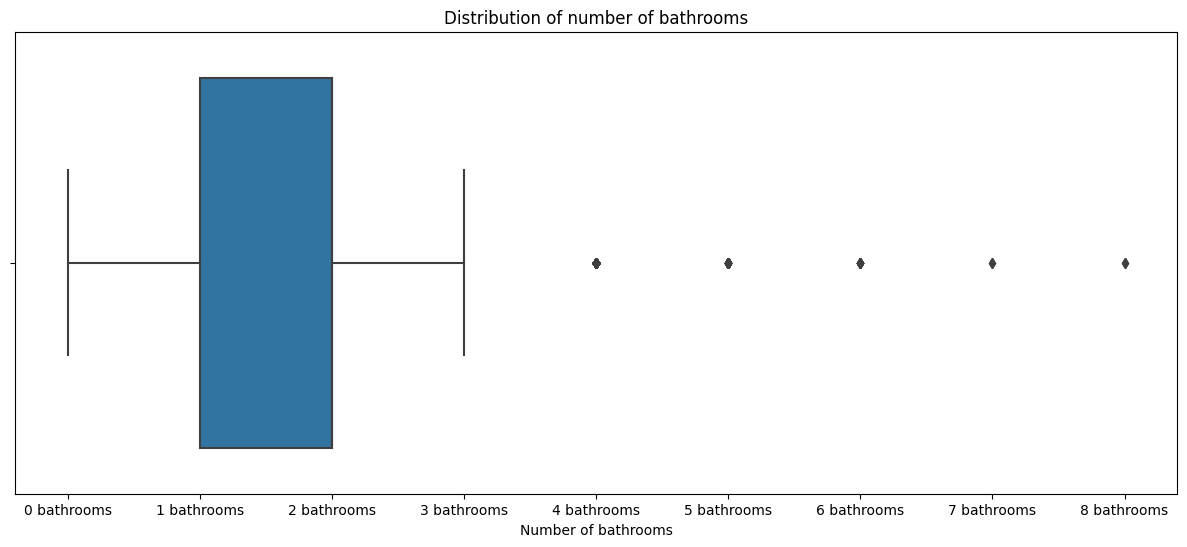

In [183]:
def readable_numbers(x):
    return f'{int(x)} bathrooms'


# Create boxplot
plt.figure(figsize=(15,6))

box = sns.boxplot(x=df_housing['bathrooms'])
g = plt.gca()
box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()])
plt.xlabel('Number of bathrooms')
plt.title('Distribution of number of bathrooms')

C:\Users\alexa\AppData\Local\Temp\ipykernel_25004\2979916683.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()])


Text(0.5, 1.0, 'Distribution of number of bedrooms')

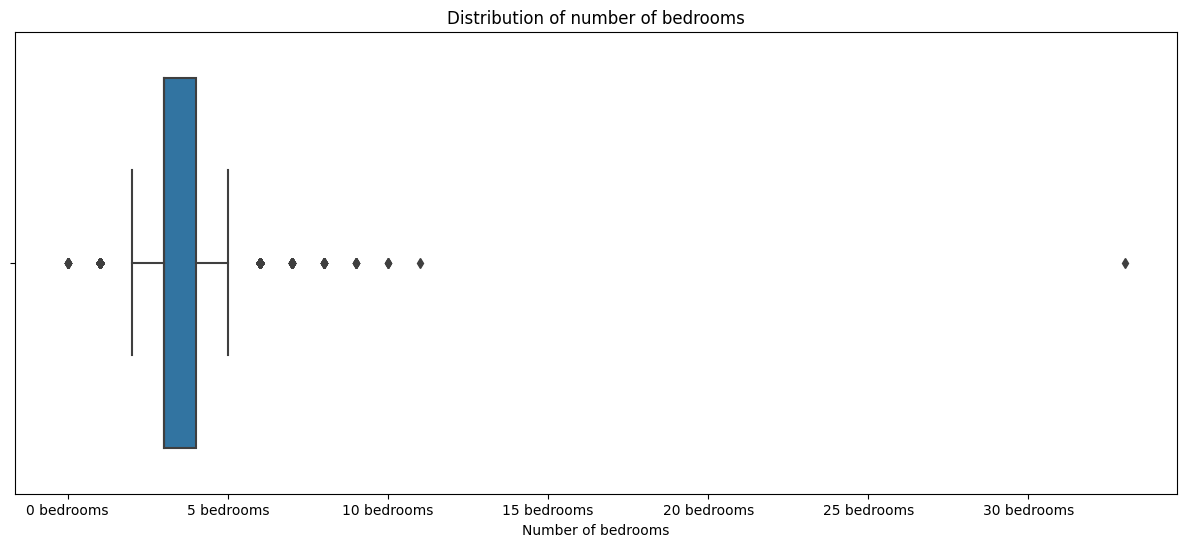

In [184]:
def readable_numbers(x):
    return f'{int(x)} bedrooms'

# Create boxplot
plt.figure(figsize=(15,6))
box = sns.boxplot(x=df_housing['bedrooms'])
g = plt.gca()
box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()])
plt.xlabel('Number of bedrooms')
plt.title('Distribution of number of bedrooms')

C:\Users\alexa\AppData\Local\Temp\ipykernel_25004\3016138872.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()])


Text(0.5, 1.0, 'Distribution of number of sqft_living')

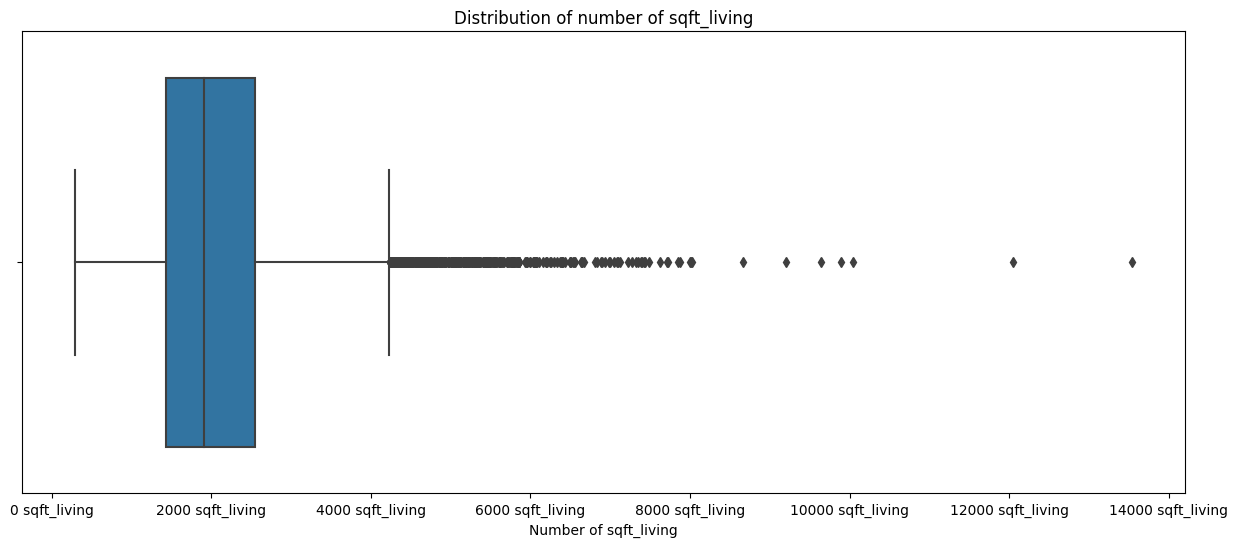

In [185]:
def readable_numbers(x):
    return f'{int(x)} sqft_living'

# Create boxplot
plt.figure(figsize=(15,6))
box = sns.boxplot(x=df_housing['sqft_living'])
g = plt.gca()
box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()])
plt.xlabel('Number of sqft_living')
plt.title('Distribution of number of sqft_living')

In [186]:
# Calculate 25th percentile of ...
percentile25 = df_housing['bedrooms'].quantile(0.25)

# Calculate 75th percentile of ...
percentile75 = df_housing['bedrooms'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit_bedrooms = percentile75 + 1.5 * iqr
lower_limit_bedrooms = percentile25 - 1.5 * iqr

print(upper_limit_bedrooms)

5.5


In [187]:
# Calculate 25th percentile of ...
percentile25 = df_housing['bathrooms'].quantile(0.25)

# Calculate 75th percentile of ...
percentile75 = df_housing['bathrooms'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit_bathrooms = percentile75 + 1.5 * iqr
lower_limit_bathrooms = percentile25 - 1.5 * iqr

print(upper_limit_bathrooms)

3.5


In [188]:
# Calculate 25th percentile of ...
percentile25 = df_housing['sqft_living'].quantile(0.25)

# Calculate 75th percentile of ...
percentile75 = df_housing['sqft_living'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit_sqft_living = percentile75 + 1.5 * iqr
lower_limit_sqft_living = percentile25 - 1.5 * iqr

print(upper_limit_sqft_living)

4234.5


In [189]:
df_housing = df_housing[df_housing['bedrooms'] <= 6]

In [190]:
df_housing = df_housing[df_housing['sqft_living'] <= 4500]

In [191]:
df_housing = df_housing[df_housing['bathrooms'] <= 4]

In [192]:
df_housing.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.118500e+04,21185,2.118500e+04,21185.000000,21185.000000,21185.000000,2.118500e+04,21185.000000,21185.000000,21185.000000,...,21185.000000,21185.000000,21185.000000,21185.000000,21185.000000,21185.000000,21185.000000,21185.000000,21185.000000,21185.000000
mean,4.589801e+09,2014-10-29 08:47:40.287939584,5.173256e+05,3.338022,1.713004,2018.103800,1.454043e+04,1.437999,0.006420,0.215152,...,7.603635,1741.104366,276.999434,1970.745008,83.368704,98078.352136,47.559404,-122.214858,1957.991173,12355.527921
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124079e+09,2014-07-22 00:00:00,3.200000e+05,3.000000,1.000000,1410.000000,5.005000e+03,1.000000,0.000000,0.000000,...,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.468500,-122.329000,1480.000000,5082.000000
50%,3.905001e+09,2014-10-16 00:00:00,4.470000e+05,3.000000,2.000000,1890.000000,7.555000e+03,1.000000,0.000000,0.000000,...,7.000000,1540.000000,0.000000,1974.000000,0.000000,98065.000000,47.570900,-122.233000,1820.000000,7570.000000
75%,7.334400e+09,2015-02-17 00:00:00,6.300000e+05,4.000000,2.000000,2500.000000,1.045400e+04,2.000000,0.000000,0.000000,...,8.000000,2160.000000,540.000000,1996.000000,0.000000,98118.000000,47.678600,-122.126000,2330.000000,9995.000000
max,9.900000e+09,2015-05-27 00:00:00,3.400000e+06,6.000000,4.000000,4500.000000,1.651359e+06,3.000000,1.000000,4.000000,...,13.000000,4500.000000,2240.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,560617.000000
std,2.877631e+09,NaN,2.995512e+05,0.867562,0.678804,796.917677,3.982274e+04,0.551057,0.079867,0.731756,...,1.106633,745.574653,417.017302,29.329337,399.304001,53.511254,0.139224,0.140878,645.942055,25408.131768


In [193]:
df_housing.shape

(21185, 21)

In [194]:
# DELETE ROWS WITH ZERO IN BEDROOMS OR BATHROOMS
df_housing = df_housing[df_housing['bedrooms'] != 0]
df_housing = df_housing[df_housing['bathrooms'] != 0]
df_housing.shape

(21095, 21)

3. Feature Engineering 

In [195]:
df_housing["yr_renovated"].value_counts()


yr_renovated
0       20214
2014       91
2013       36
2007       35
2005       34
        ...  
1954        1
1959        1
1951        1
1948        1
1944        1
Name: count, Length: 70, dtype: int64

In [196]:
df_housing["yr_renovated"].sort_values(ascending=True)

0           0
14267       0
14266       0
14265       0
14264       0
         ... 
15687    2015
16683    2015
7417     2015
11633    2015
19444    2015
Name: yr_renovated, Length: 21095, dtype: int64

In [197]:
#Manual One Hot Encoding
def categorize_age(years):
    if years == 0:
        return 0
    else:
        return 1
    
df_housing['Renovated'] = df_housing['yr_renovated'].apply(categorize_age)

df_housing=df_housing.drop(['yr_renovated'], axis=1)


In [198]:
df_housing.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
0,7229300521,2014-10-13,231300.0,2,1,1180,5650,1,0,0,...,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,0


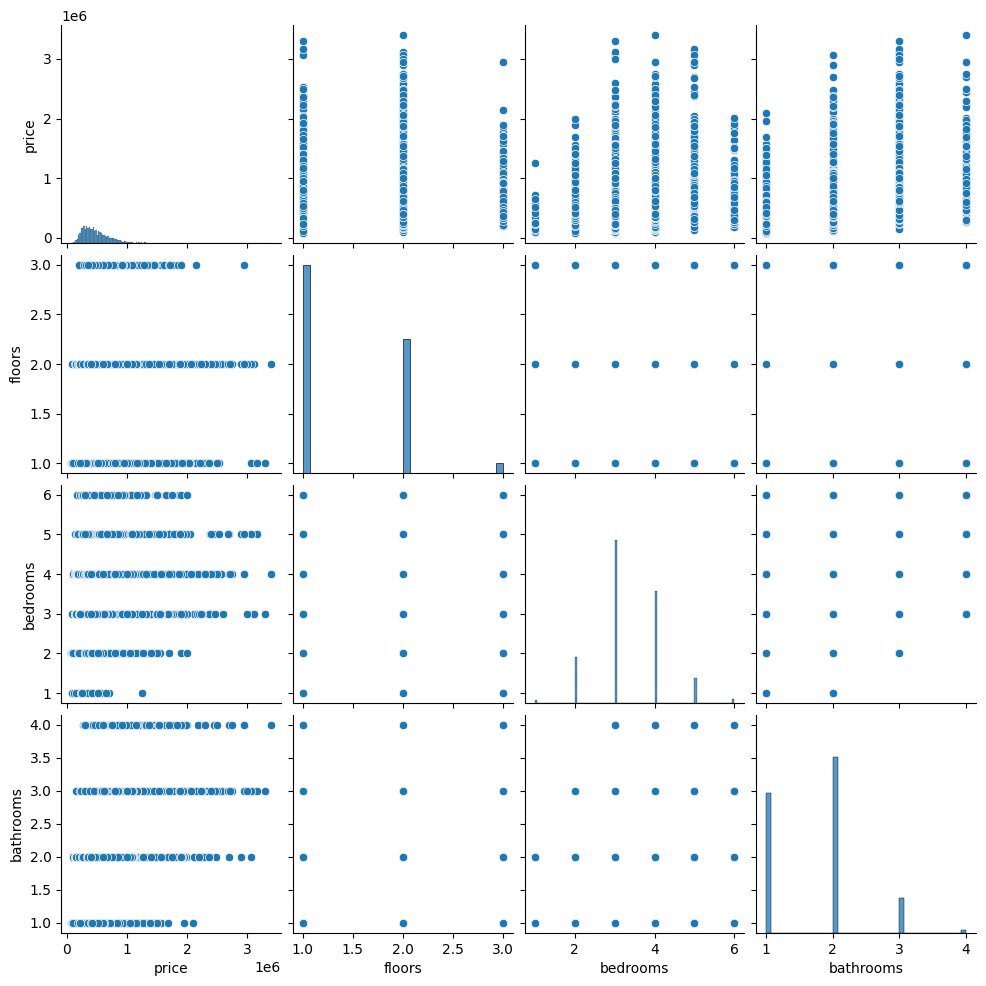

In [199]:
df_housing_sub=df_housing[["price","floors","bedrooms","bathrooms"]]
sns.pairplot(df_housing_sub)

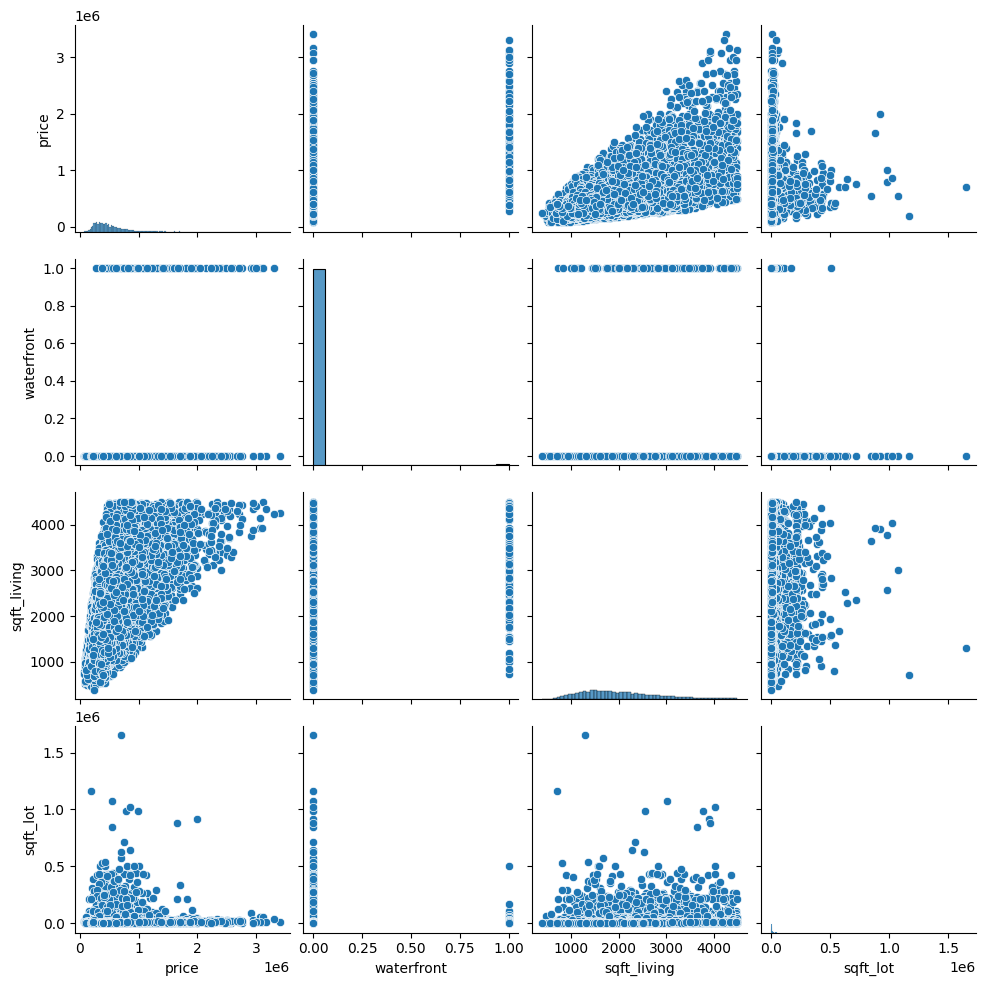

In [200]:
df_housing_sub2=df_housing[["price","waterfront","sqft_living","sqft_lot"]]
sns.pairplot(df_housing_sub2)

In [201]:
#df_housing_sub3=df_housing[["price","yr_renovated"]]
#sns.pairplot(df_housing_sub3)

In [202]:
#DISTRIBUTION OF TOTAL AMOUNT SPENT
"""plt.figure(figsize=(10,6))
sns.histplot(df_housing["price"],bins=50,kde=False)
plt.title("Distribution of Total Amounts Spent")
plt.xlabel("Total Amont (bin)")
plt.ylabel("Count of Total Amount")"""

'plt.figure(figsize=(10,6))\nsns.histplot(df_housing["price"],bins=50,kde=False)\nplt.title("Distribution of Total Amounts Spent")\nplt.xlabel("Total Amont (bin)")\nplt.ylabel("Count of Total Amount")'

<Axes: >

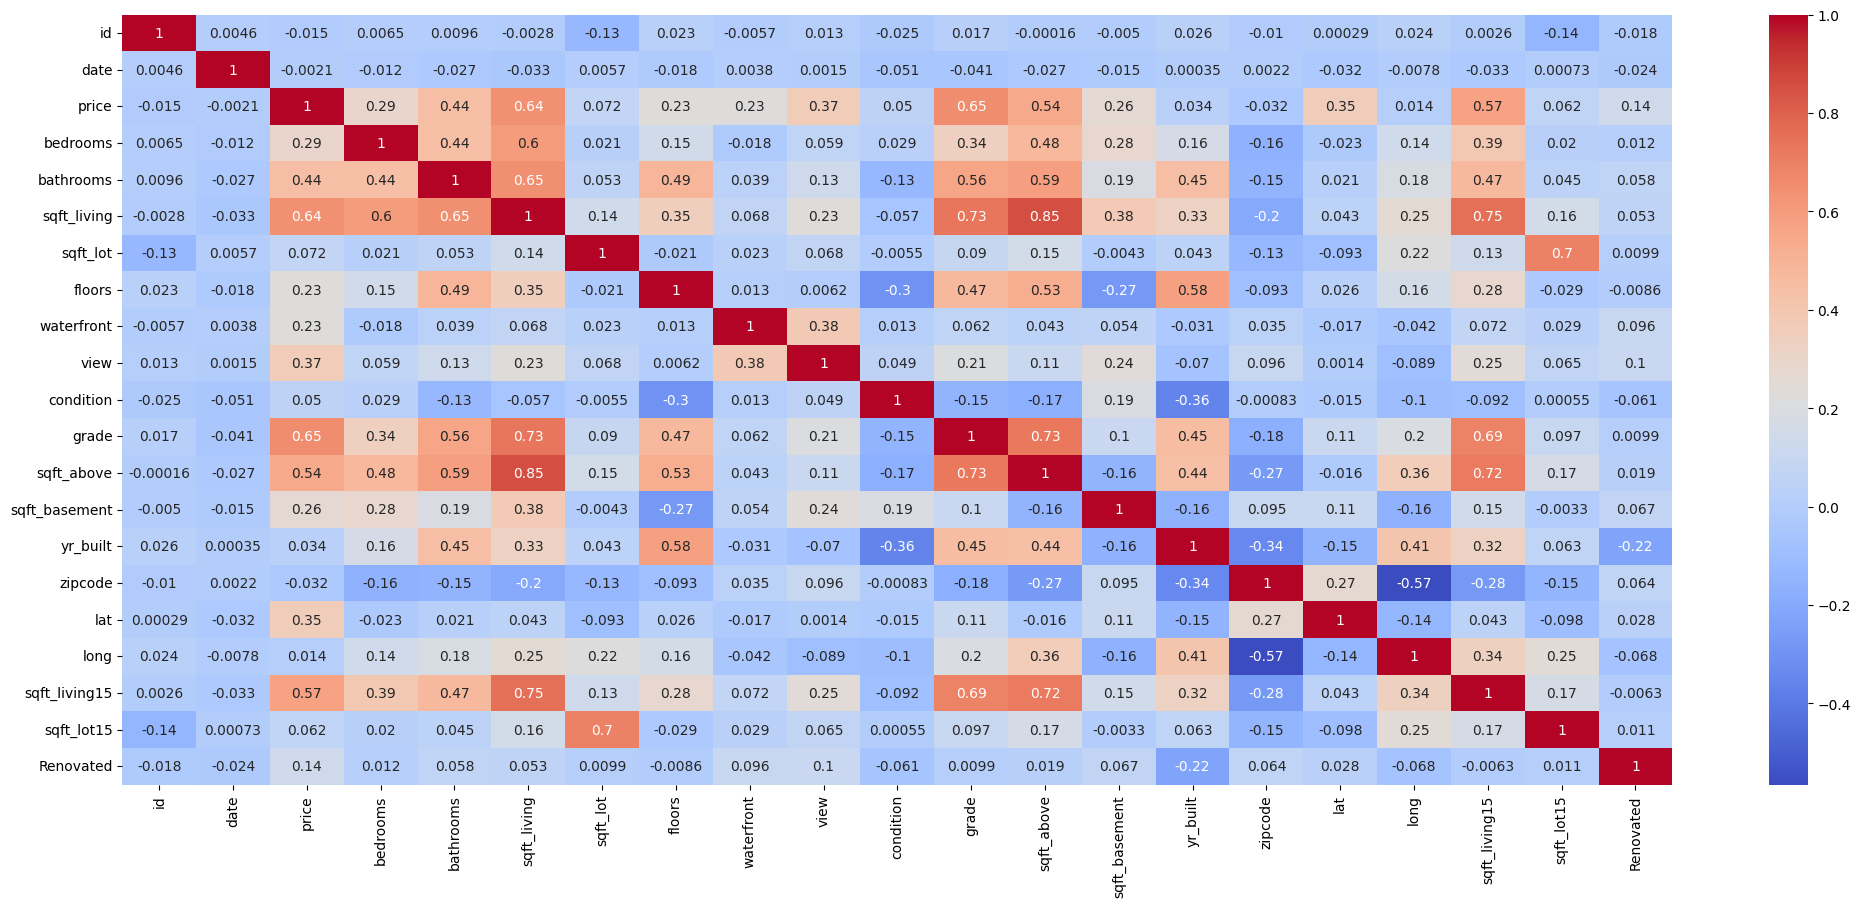

In [203]:
plt.figure(figsize=(25,10))
sns.heatmap(df_housing.corr(), annot=True, cmap='coolwarm')

In [204]:
#Establish the independent and dependent variables
#X_sub=df_housing.drop('price',axis=1)
#y_sub=df_housing['price']

#from the independent variables you need to drop some features from the lowest correlation to an average correlation (0.5 , 0.6)
#X_sub.drop('weight', axis=1, inplace=True)

In [205]:
#df_housing.info()

4. DATA SPLITTING

In [206]:
from sklearn.model_selection import train_test_split # type: ignore
y=df_housing[["price"]]
X=df_housing[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","sqft_living15","sqft_lot15","Renovated"]]
# Import the scaler function
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data
X_test = scaler.transform(X_test)

In [ ]:
# 4. Data Visualization in Python

In [1]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/Home/Downloads/Lambton/MHS/2nd Term/Big Data Visualization/Group Project/Group Project 1/housing_cleaned.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(data.head())


   Unnamed: 0          id       date   price  bedrooms  bathrooms  \
0           0  7229300521 2014-10-13  231300         2          1   
1           1  6414100192 2014-12-09  538000         3          2   
2           2  5631500400 2015-02-25  180000         2          1   
3           3  2487200875 2014-12-09  604000         4          3   
4           4  1954400510 2015-02-18  510000         3          2   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650       1           0  ...      7        1180   
1         2570      7242       2           0  ...      7        2170   
2          770     10000       1           0  ...      6         770   
3         1960      5000       1           0  ...      7        1050   
4         1680      8080       1           0  ...      8        1680   

   sqft_basement  yr_built  zipcode      lat     long  sqft_living15  \
0              0      1955    98178  47.5112 -122.257           1340   
1       

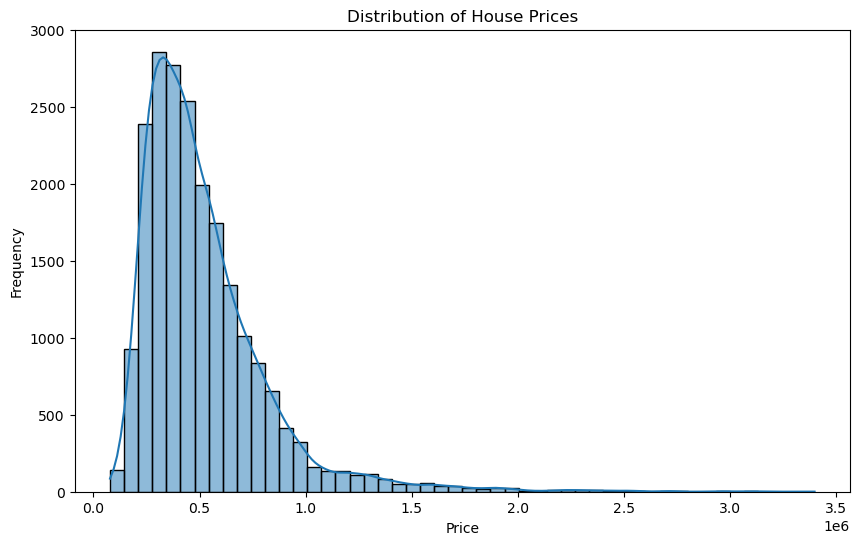

In [2]:
# Price Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


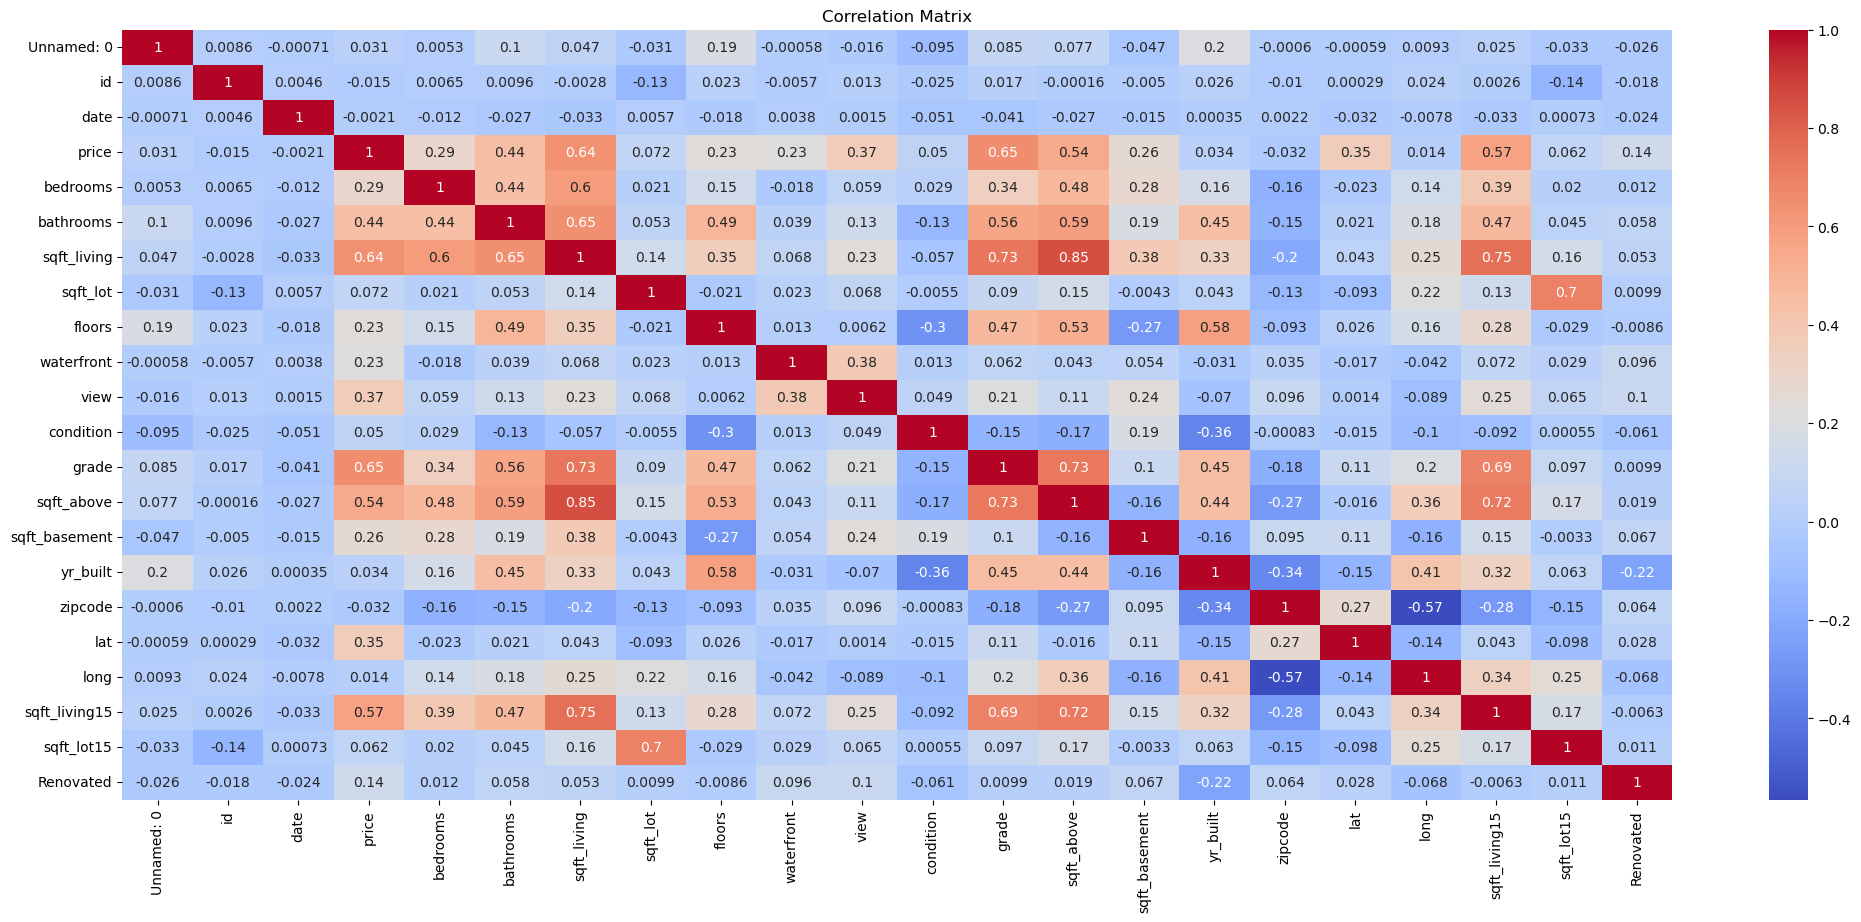

In [4]:
# Correlation Matrix
plt.figure(figsize=(25, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


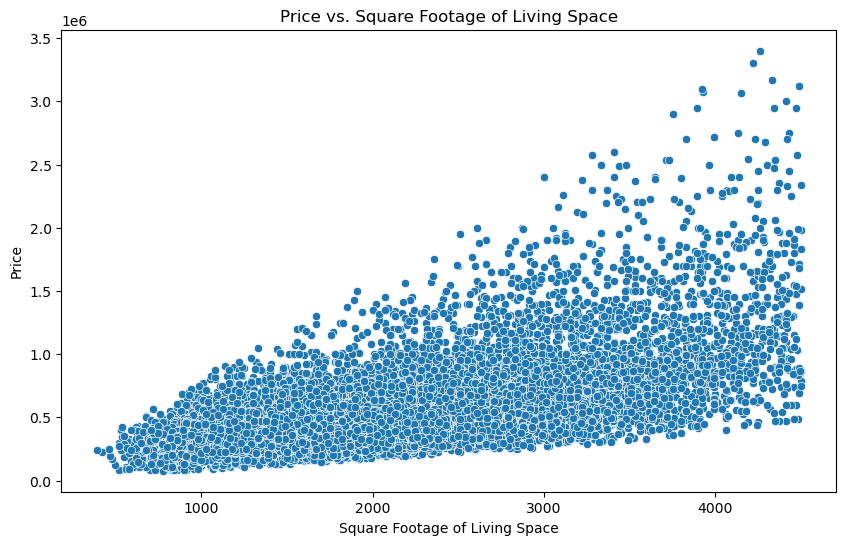

In [5]:
# Price vs. Other Features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title('Price vs. Square Footage of Living Space')
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
plt.show()


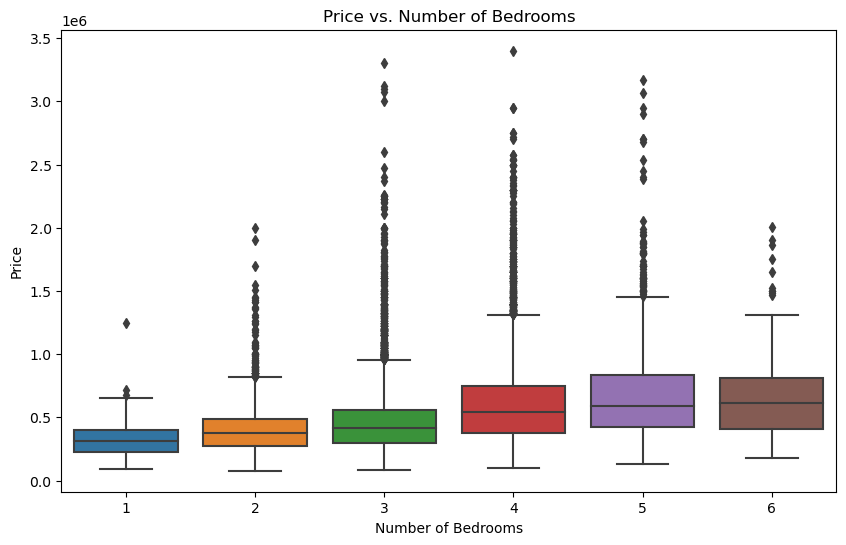

In [6]:
# Box Plot: Price vs. Number of Bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


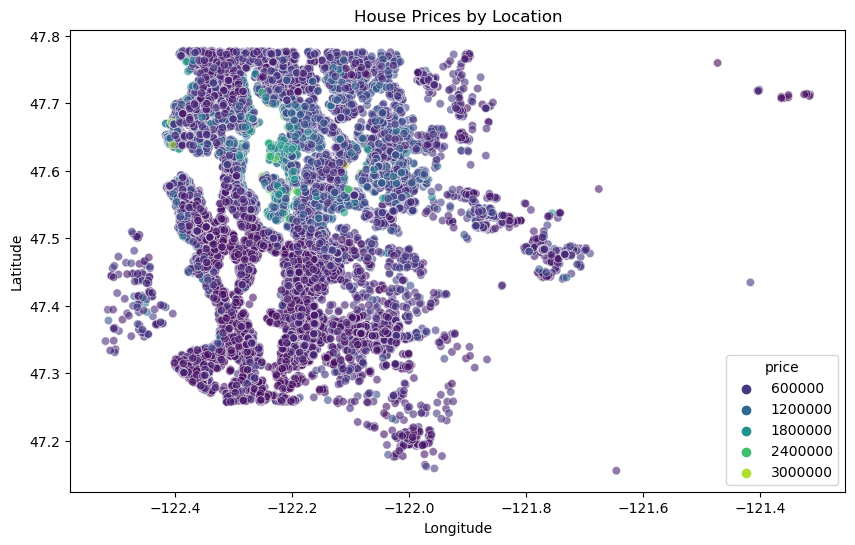

In [7]:
# Price by Location
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='price', data=data, palette='viridis', alpha=0.6)
plt.title('House Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


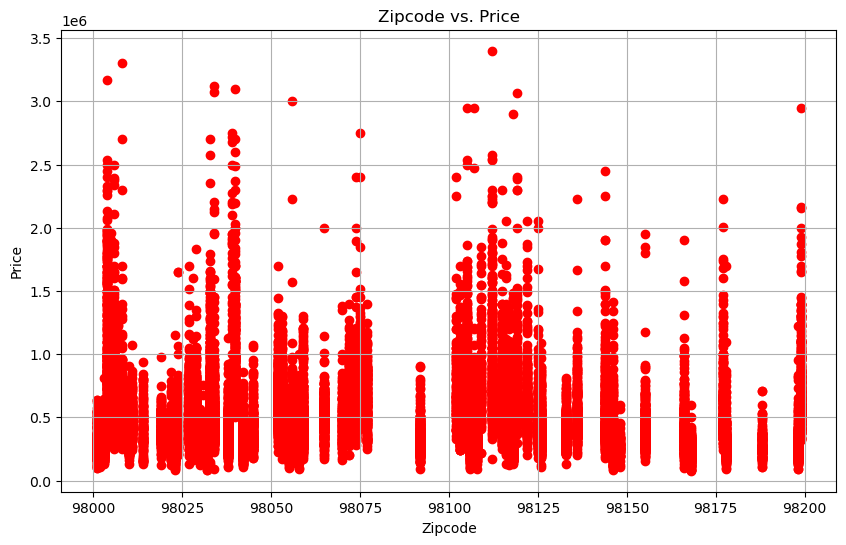

In [19]:
# Price by Zip Code

plt.figure(figsize=(10, 6))
plt.scatter(data['zipcode'], data['price'], color="red")
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Zipcode vs. Price')
plt.grid(True)
plt.show()

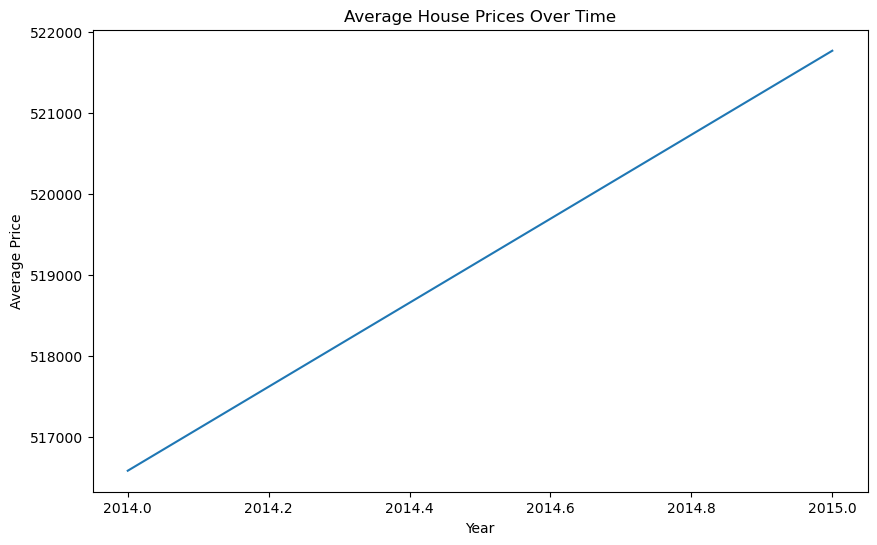

In [8]:
# Trend Over Time
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='price', data=data.groupby('year')['price'].mean().reset_index())
plt.title('Average House Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


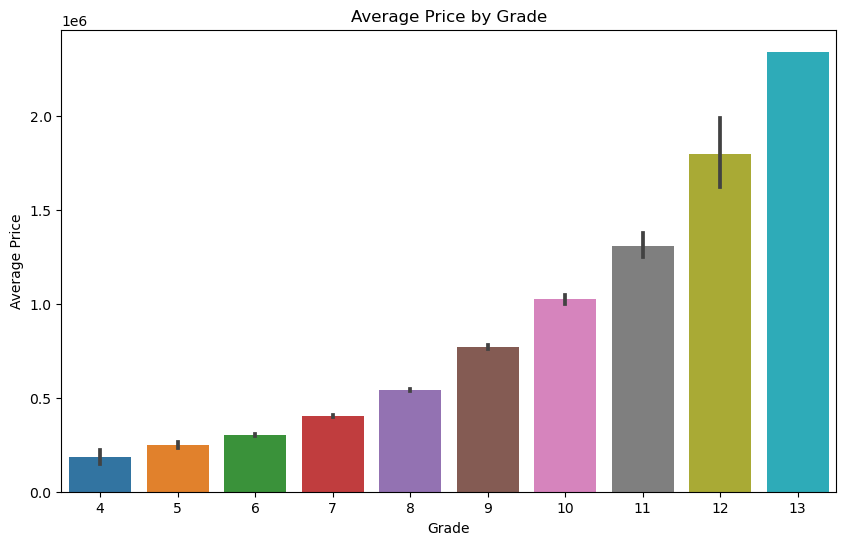

In [9]:
# Categorical Analysis
# Bar Plot: Average Price by Grade
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='price', data=data)
plt.title('Average Price by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Price')
plt.show()


C:\Users\Home\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


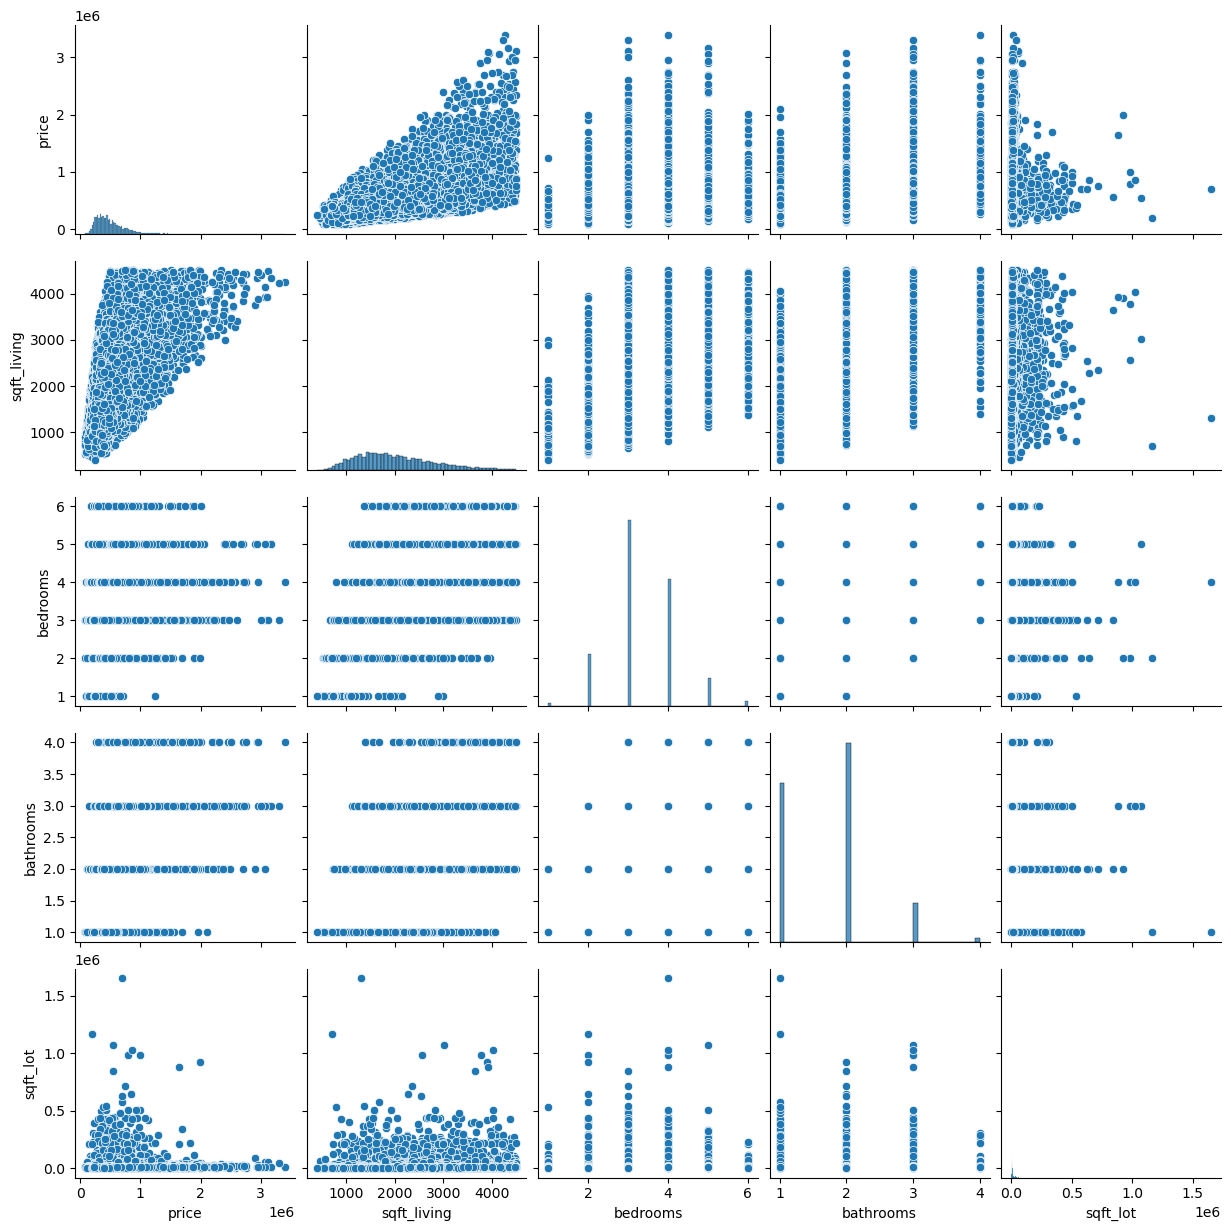

In [10]:
# Pair Plot
sns.pairplot(data[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']])
plt.show()


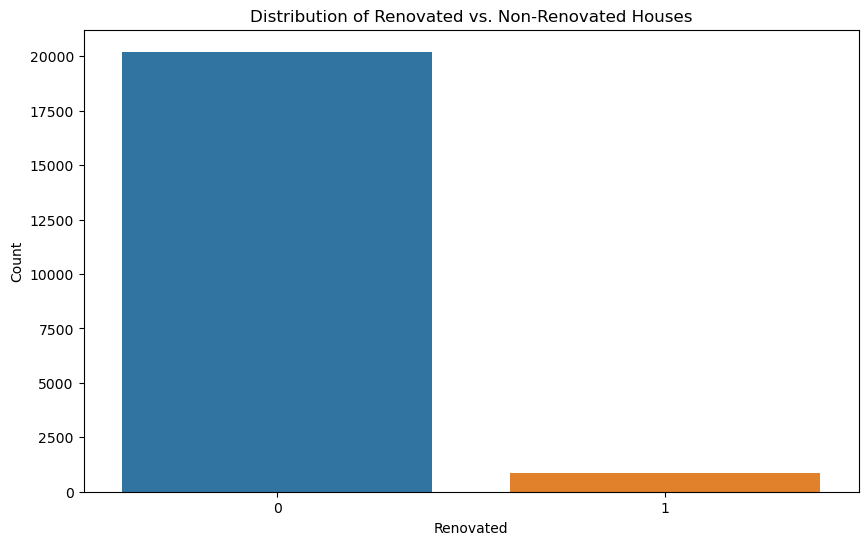

In [11]:
# Distribution of Renovated Houses
plt.figure(figsize=(10, 6))
sns.countplot(x='Renovated', data=data)
plt.title('Distribution of Renovated vs. Non-Renovated Houses')
plt.xlabel('Renovated')
plt.ylabel('Count')
plt.show()


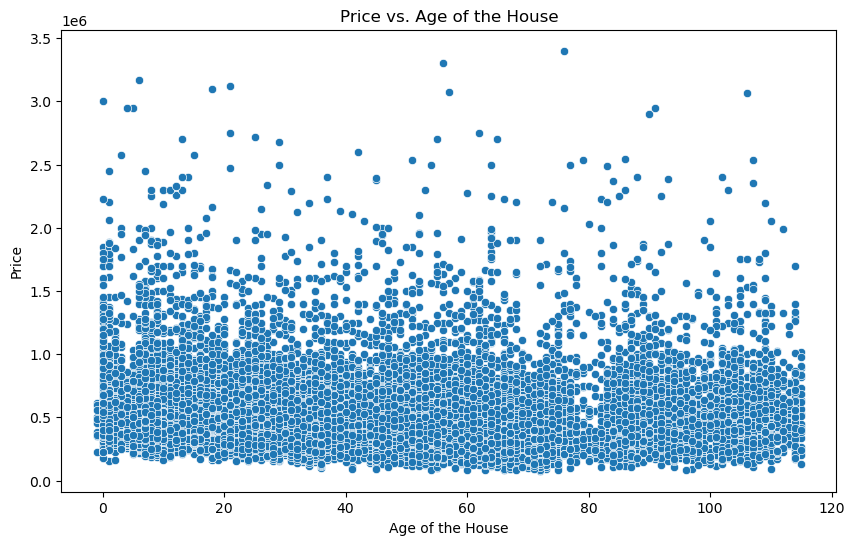

In [12]:
# Price vs. Age of the House
data['age'] = data['date'].dt.year - data['yr_built']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=data)
plt.title('Price vs. Age of the House')
plt.xlabel('Age of the House')
plt.ylabel('Price')
plt.show()


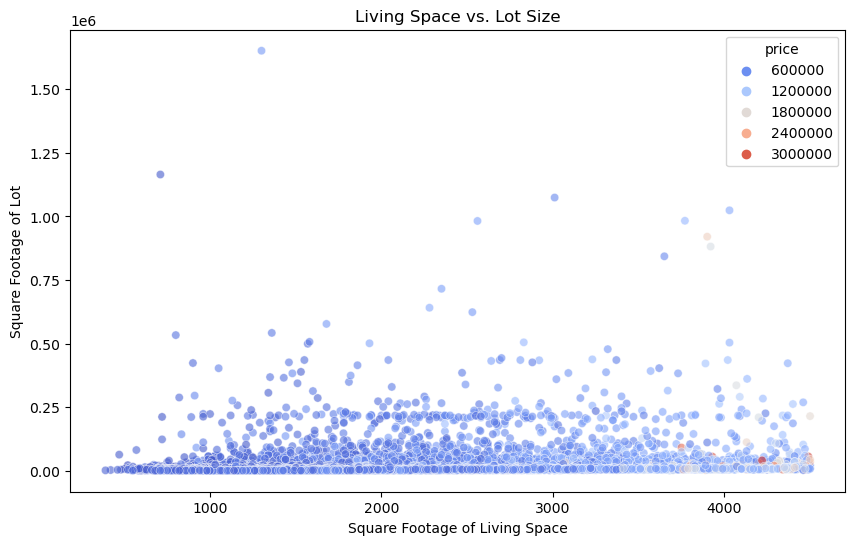

In [13]:
# Comparison of Living Space vs. Lot Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='sqft_lot', hue='price', data=data, palette='coolwarm', alpha=0.6)
plt.title('Living Space vs. Lot Size')
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Square Footage of Lot')
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:/Users/Home/Downloads/Lambton/MHS/2nd Term/Big Data Visualization/Group Project/Group Project 1/housing_cleaned.xlsx"
data = pd.read_excel(file_path)

# Prepare data for visualizations
yr_built_price = data.groupby('yr_built')['price'].mean().reset_index()
sqft_living_price = data[['sqft_living', 'price']]
sqft_lot_price = data[['sqft_lot', 'price']]
floors_price = data.groupby('floors')['price'].mean().reset_index()
view_price = data[['view', 'price']]
condition_price = data.groupby('condition')['price'].mean().reset_index()
grade_price = data.groupby('grade')['price'].mean().reset_index()
waterfront_price = data.groupby('waterfront')['price'].mean().reset_index()

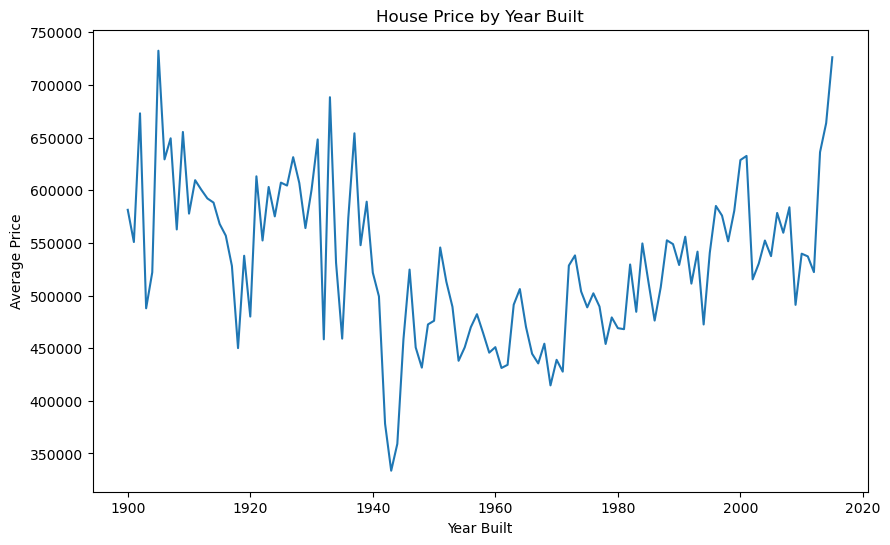

In [9]:
# Line Chart: House Price by Year Built
plt.figure(figsize=(10, 6))
sns.lineplot(x='yr_built', y='price', data=yr_built_price)
plt.title('House Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.show()

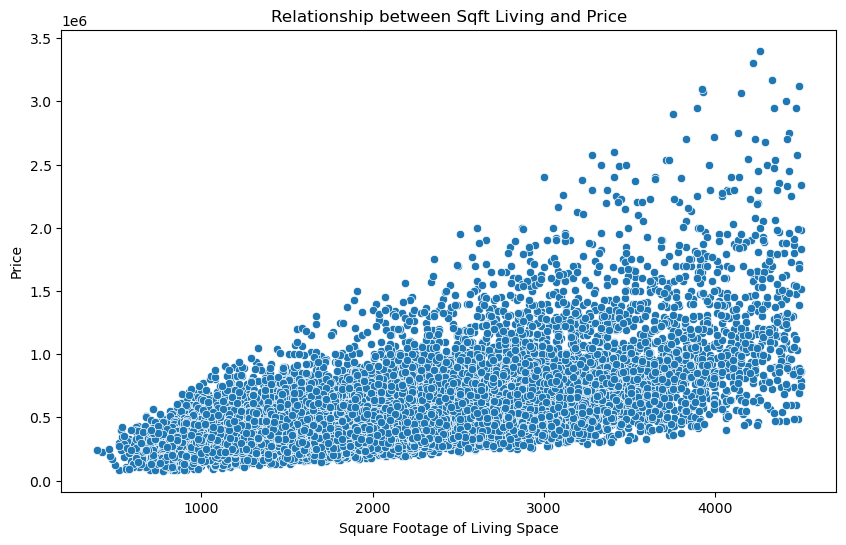

In [10]:
# Scatter Plot: Relationship between Sqft Living and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=sqft_living_price)
plt.title('Relationship between Sqft Living and Price')
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
plt.show()

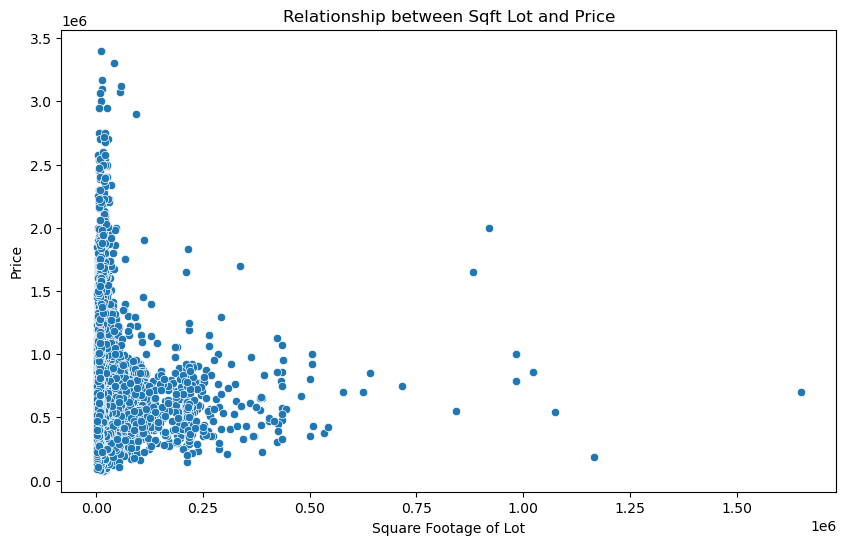

In [11]:
# Scatter Plot: Relationship between Sqft Lot and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_lot', y='price', data=sqft_lot_price)
plt.title('Relationship between Sqft Lot and Price')
plt.xlabel('Square Footage of Lot')
plt.ylabel('Price')
plt.show()

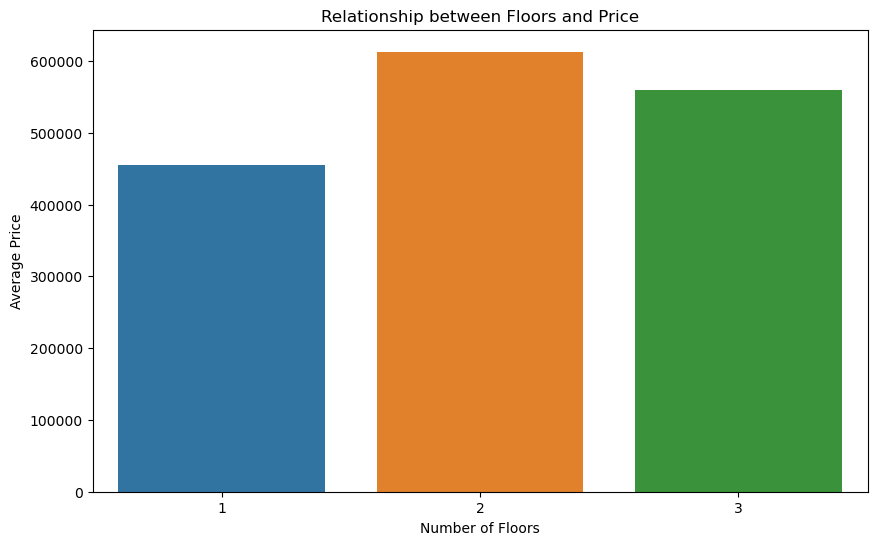

In [12]:
# Bar Chart: Relationship between Floors and Price
plt.figure(figsize=(10, 6))
sns.barplot(x='floors', y='price', data=floors_price)
plt.title('Relationship between Floors and Price')
plt.xlabel('Number of Floors')
plt.ylabel('Average Price')
plt.show()

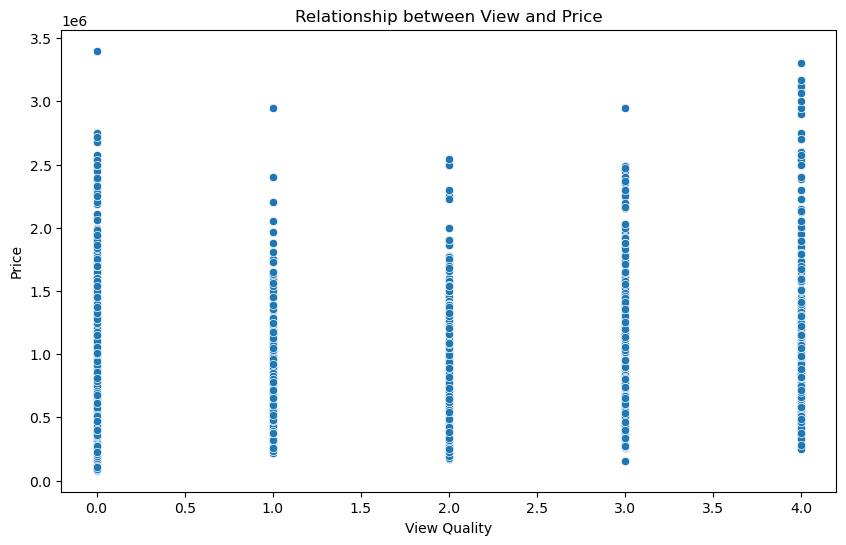

In [13]:
# Scatter Plot: Relationship between View and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view', y='price', data=view_price)
plt.title('Relationship between View and Price')
plt.xlabel('View Quality')
plt.ylabel('Price')
plt.show()

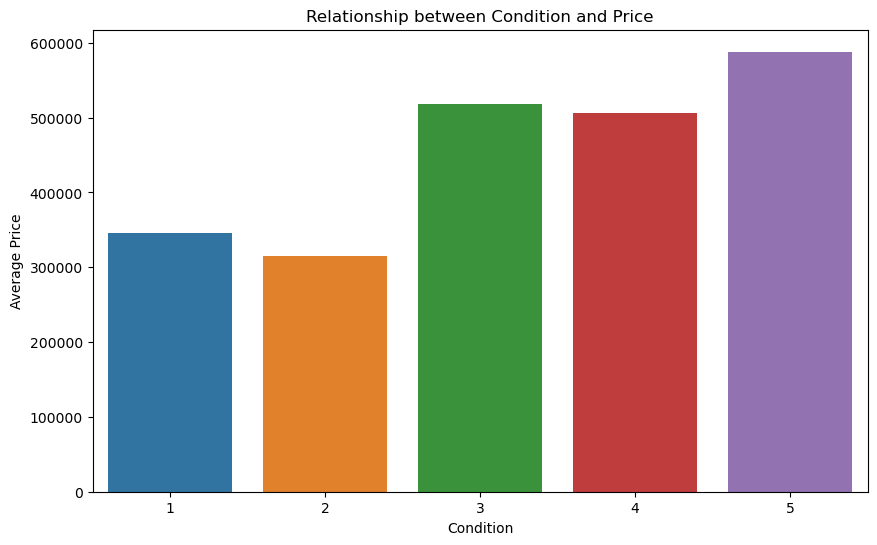

In [14]:
# Bar Chart: Relationship between Condition and Price
plt.figure(figsize=(10, 6))
sns.barplot(x='condition', y='price', data=condition_price)
plt.title('Relationship between Condition and Price')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.show()

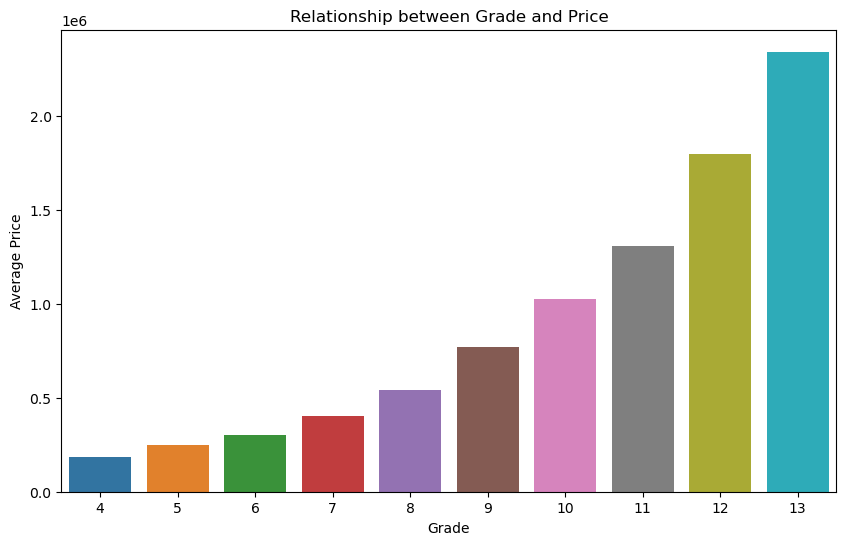

In [15]:
# Bar Chart: Relationship between Grade and Price
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='price', data=grade_price)
plt.title('Relationship between Grade and Price')
plt.xlabel('Grade')
plt.ylabel('Average Price')
plt.show()

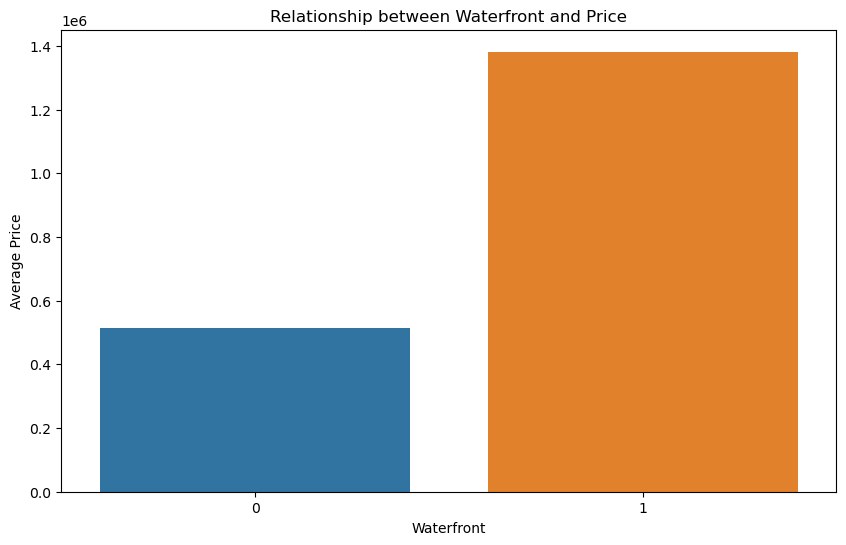

In [16]:
# Bar Chart: Relationship between Waterfront and Price
plt.figure(figsize=(10, 6))
sns.barplot(x='waterfront', y='price', data=waterfront_price)
plt.title('Relationship between Waterfront and Price')
plt.xlabel('Waterfront')
plt.ylabel('Average Price')
plt.show()

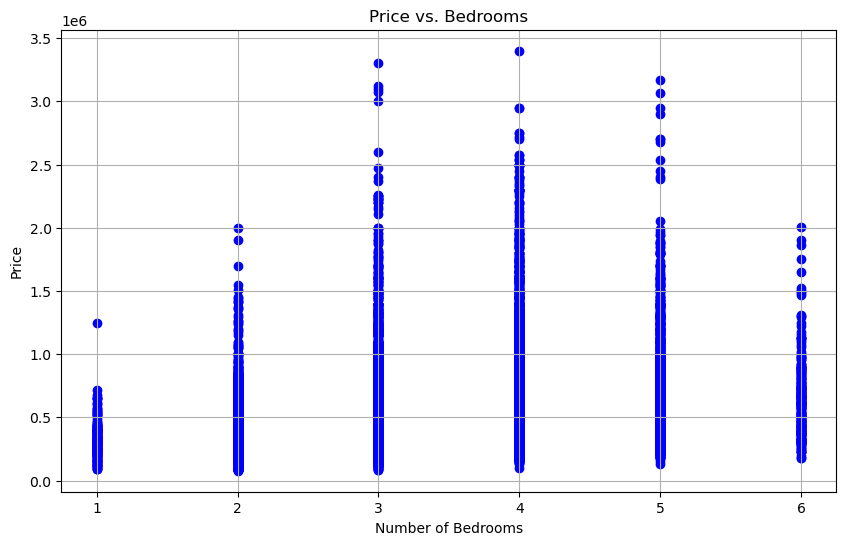

In [20]:
# Price vs Bedrooms

plt.figure(figsize=(10, 6))
plt.scatter(data['bedrooms'], data['price'], color="blue")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price vs. Bedrooms')
plt.grid(True)
plt.show()

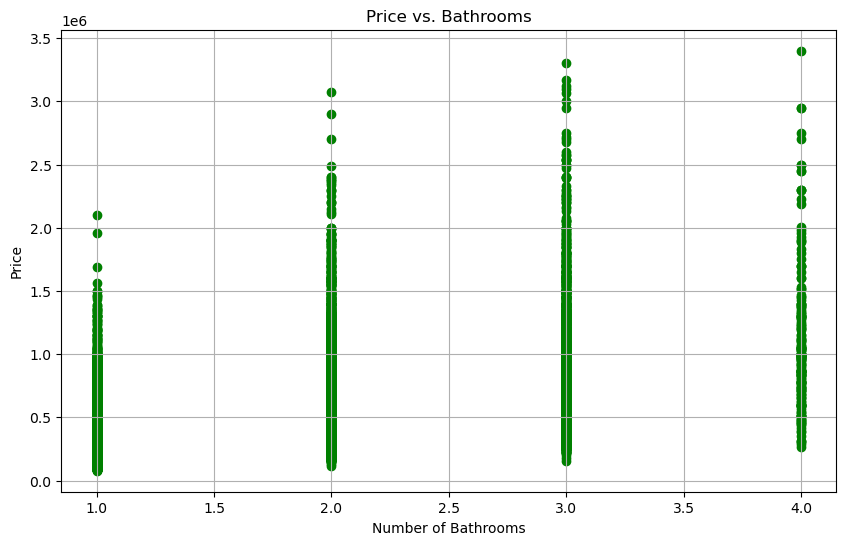

In [21]:
# Price vs Bathrooms

plt.figure(figsize=(10, 6))
plt.scatter(data['bathrooms'], data['price'], color="green")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Price vs. Bathrooms')
plt.grid(True)
plt.show()
